## Fashion MNIST Classification

We will uses the Fashion MNIST dataset which contains 70,000 grayscale images in 10 categories. The images show individual articles of clothing at low resolution (28 by 28 pixels), as seen here:

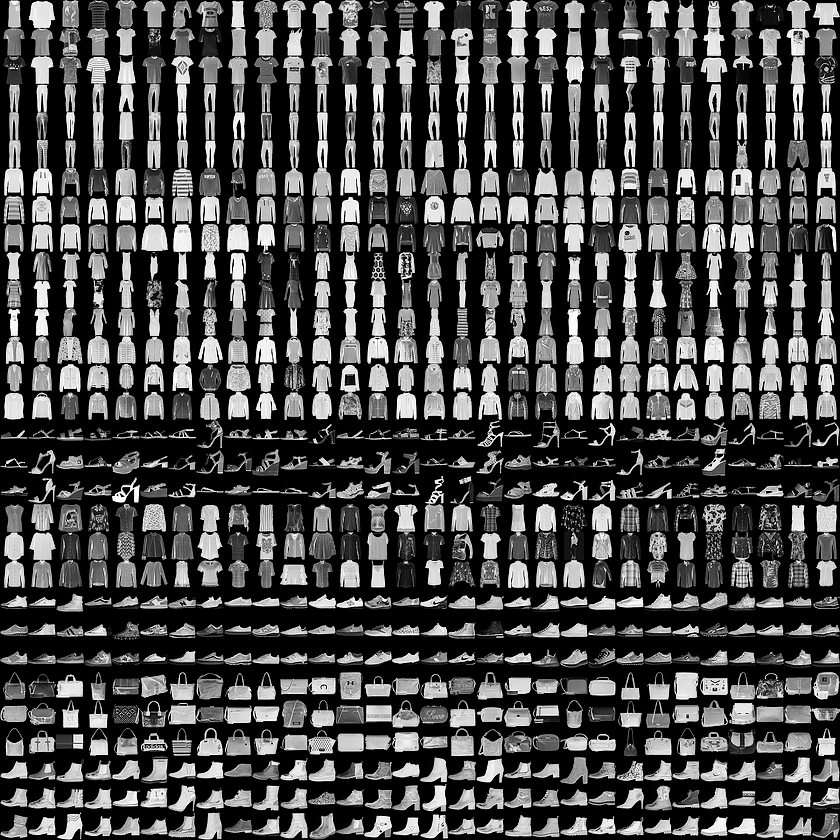

### Importing all the necessary Librarys

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import tensorflow as tf
from tensorflow import keras


### Import the Fashion MNIST datase
The fashion MINST dataset is already present in keras dataset. We can just load it from Keras.datasets

In [134]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

We will use 60,000 images to train the network and 10,000 images to evaluate how accurately the network learned to classify images.

In [135]:
train_images.shape

(60000, 28, 28)

In [136]:
test_images.shape

(10000, 28, 28)

#### Each image is mapped to a single label. Since the class names are not included with the dataset, store them here to use later when plotting the images:

In [137]:
class_names = ['T-shirt','trouser','pullover','dress','coat','sandel','shirt','sneakers','bag','Ankel boot']

Lets Visualize a piece of the dataset

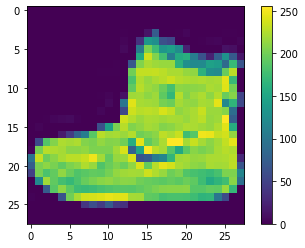

In [138]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()


The images must be preprocessed before training the network. From the above visualization you will see that the pixel values fall in the range of 0 to 255:


In [139]:
train_images = train_images / 255.0

test_images = test_images / 255.0



Display the first 25 images from the training set and display the class name below each image. Verify that the data is in the correct format and we're ready to build and train the network.



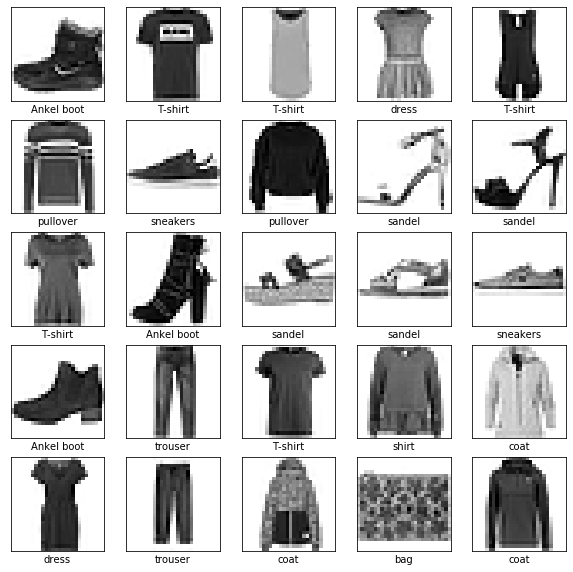

In [140]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

### Now Lets Build a Model

#### In our model we will use 3 Layers


In the first layer of this network, tf.keras.layers.Flatten, transforms the format of the images from a 2d-array (of 28 by 28 pixels), to a 1d-array of 28 * 28 = 784 pixels. Think of this layer as unstacking rows of pixels in the image and lining them up. This layer has no parameters to learn; it only reformats the data.

After the pixels are flattened, the network consists of a sequence of two tf.keras.layers.Dense layers. These are densely-connected, or fully-connected, neural layers. The first Dense layer has 128 nodes (or neurons). The second (and last) layer is a 10-node softmax layer—this returns an array of 10 probability scores that sum to 1. Each node contains a score that indicates the probability that the current image belongs to one of the 10 classes.



In [141]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

#### Compiling the Model

Before the model is ready for training, it needs a few more settings. These are added during the model's compile step:

Loss function —This measures how accurate the model is during training.

Optimizer —This is how the model is updated based on the data it sees and its loss function.

Metrics —Used to monitor the training and testing steps. The following example uses accuracy, the fraction of the images that are correctly classified.

In [142]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])



### Traning the model


Training the neural network model requires the following steps:

Feed the training data to the model—in this example, the train_images and train_labels arrays.

The model learns to associate images and labels.

We ask the model to make predictions about a test set—in this example, the test_images array. We verify that the predictions match the labels from the test_labels array.

To start training, call the model.fit method—the model is "fit" to the training data:

We will take epochs and train the data


In [143]:
model.fit(train_images, train_labels, epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 4s 69us/sample - loss: 0.5001 - accuracy: 0.8239 9s - loss: 0.7322 - a - E
Epoch 2/5
60000/60000 [==============================] - 3s 45us/sample - loss: 0.3760 - accuracy: 0.8643
Epoch 3/5
60000/60000 [==============================] - 3s 46us/sample - loss: 0.3349 - accuracy: 0.8779
Epoch 4/5
60000/60000 [==============================] - 3s 55us/sample - loss: 0.3122 - accuracy: 0.8858
Epoch 5/5
60000/60000 [==============================] - 3s 55us/sample - loss: 0.2937 - accuracy: 0.8920



Now Lets check the accuracy of the model

In [144]:


test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 0s 36us/sample - loss: 0.3411 - accuracy: 0.8790
Test accuracy: 0.879



It turns out, the accuracy on the test dataset is a little less than the accuracy on the training dataset. This gap between training accuracy and test accuracy is an example of overfitting. Overfitting is when a machine learning model performs worse on new data than on their training data.


### Now we will make predictions for the test set


In [145]:
predictions = model.predict(test_images)
predictions

array([[1.4033699e-07, 9.9663040e-08, 3.1902361e-09, ..., 3.8879175e-02,
        8.9091316e-08, 9.6100163e-01],
       [1.2033186e-04, 2.0153922e-12, 9.9584204e-01, ..., 2.8121971e-13,
        3.4028321e-08, 1.0255446e-11],
       [7.3330324e-07, 9.9999917e-01, 1.1525992e-09, ..., 3.0868132e-15,
        2.3907545e-09, 2.2087079e-14],
       ...,
       [3.1724186e-03, 7.2272375e-09, 7.7501283e-04, ..., 7.4403346e-08,
        9.9409521e-01, 7.9401268e-09],
       [2.4866168e-07, 9.9997890e-01, 1.6102346e-10, ..., 2.9032388e-10,
        3.9309565e-08, 3.1431413e-09],
       [7.9299585e-04, 7.1763466e-06, 1.8092997e-04, ..., 5.9735034e-02,
        1.1023259e-02, 4.8378250e-04]], dtype=float32)

A prediction is an array of 10 numbers. These describe the "confidence" of the model that the image corresponds to each of the 10 different articles of clothing. We can see which label has the highest confidence value:

In [146]:
predictions[1]

array([1.2033186e-04, 2.0153922e-12, 9.9584204e-01, 2.3255091e-09,
       9.3433581e-04, 2.7862670e-08, 3.1031983e-03, 2.8121971e-13,
       3.4028321e-08, 1.0255446e-11], dtype=float32)

In [147]:
np.argmax(predictions[1])

2

In [148]:
test_labels[1]

2

We can graph this to look at the full set of 10 channels

In [224]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)


def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks(range(10), class_names,rotation=45)
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
 
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

Defining a Function to visualize

In [225]:
def plot(i):
    plt.figure(figsize=(10,3))
    plt.subplot(1,2,1)
    plot_image(i, predictions, test_labels, test_images)
    plt.subplot(1,2,2)
    plot_value_array(i, predictions,  test_labels)
    plt.show()

Now let's look at the few images, predictions, and prediction array.

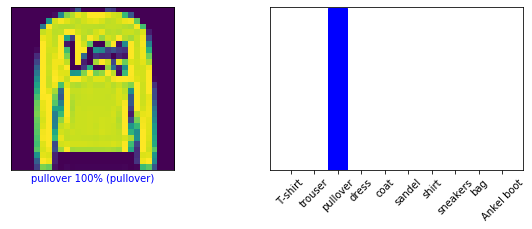

In [226]:
plot(1)

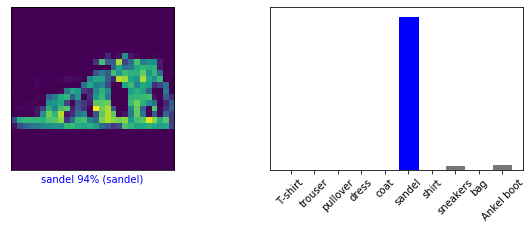

In [227]:
plot(11)


Let's plot several images with their predictions. Correct prediction labels are blue and incorrect prediction labels are red. The number gives the percent (out of 100) for the predicted label. Note that it can be wrong even when very confident.


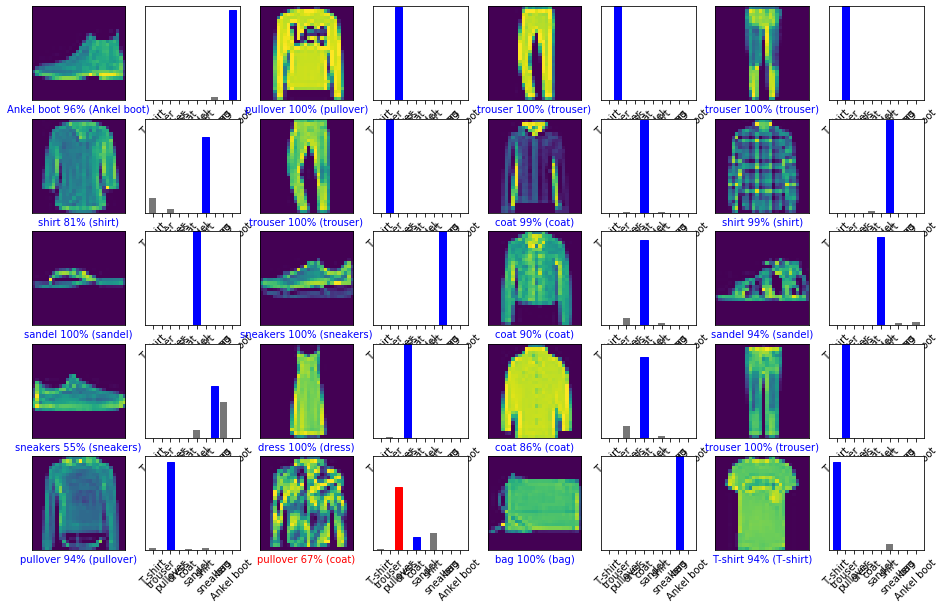

In [242]:
num_rows = 5
num_cols = 4
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()

Lets have a look at some testset 

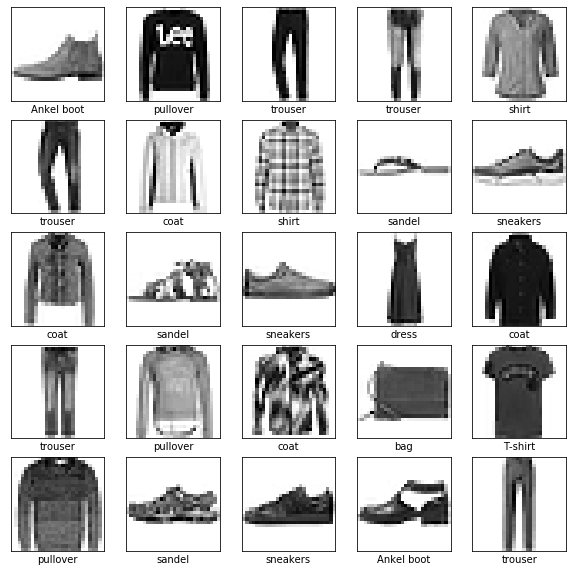

In [244]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i],cmap=plt.cm.binary)
    plt.xlabel(class_names[test_labels[i]])
plt.show()

Finally,we will use the trained model to make a prediction about a single image.

Text(0.5, 0, 'Ankel boot')

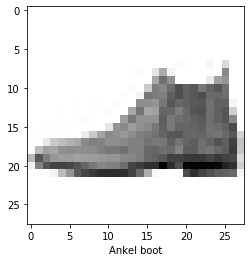

In [257]:
img=test_images[0]
plt.imshow(img,cmap=plt.cm.binary)

plt.xlabel(class_names[test_labels[0]])

Now as the tf.keras models are optimized to make predictions on a batch, or collection, of examples at once. So even though we're using a single image, we need to add it to a list:

In [258]:
img=(np.expand_dims(img,0))

In [259]:
img.shape

(1, 28, 28)

Now we will predict the test image

In [260]:
predict=model.predict(img)
predict


array([[1.40337136e-07, 9.96630405e-08, 3.19023008e-09, 8.88232350e-08,
        1.14158915e-07, 1.17381889e-04, 1.35949858e-06, 3.88791747e-02,
        8.90911451e-08, 9.61001635e-01]], dtype=float32)

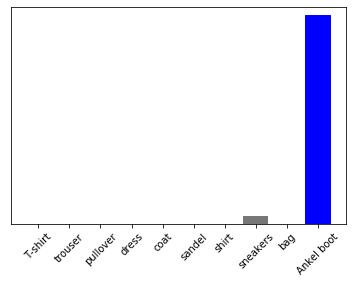

In [240]:
plot_value_array(0, predict, test_labels)
_ =plt.xticks(range(10), class_names, rotation=45)

tf.keras models are optimized to make predictions on a batch, or collection, of examples at once. So even though we're using a single image, we need to add it to a list:

In [241]:
np.argmax(predict[0])

9